#### Gráfico de Barras

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import sample

#### Funções...

In [2]:
def coresPlotar(quantidade = 6) -> list:
    coresCSS=mcolors.CSS4_COLORS

    #print(coresCSS)
    aCores=[]
    
    for c in coresCSS:
        aCores.append(coresCSS[c])

    return sample(aCores, quantidade)

def barPlot(dados, etiquetas, **kwargs):
    plt.figure(figsize=(12,6))
    plt.title(kwargs['titulo'], fontdict={'size':14, 'weight':'bold'})

    plt.bar(height=dados, x=etiquetas, width=.9, color=kwargs['cores'], lw=.75, ec='black')

    plt.xlabel(kwargs['xlabel'], fontdict={'size':14, 'weight':'bold'})
    plt.ylabel(kwargs['ylabel'], fontdict={'size':14, 'weight':'bold'})
    plt.show()

In [3]:
ces2020 = pd.read_csv('./dados/MICRODADOS_CADASTRO_CURSOS_2020_ALTO_TIETE.csv',
                        header=0,
                        sep=';',
                        encoding='latin-1',
                        low_memory=False
                      )

##### Dados Cine Area Geral.

In [4]:
pd.DataFrame(ces2020['NO_CINE_AREA_GERAL'].unique())

,0
0,Educação
1,"Negócios, administração e direito"
2,Computação e Tecnologias da Informação e Comun...
3,Artes e humanidades
4,"Ciências sociais, comunicação e informação"
5,"Engenharia, produção e construção"
6,Saúde e bem-estar
7,"Ciências naturais, matemática e estatística"
8,Serviços
9,"Agricultura, silvicultura, pesca e veterinária"


In [5]:
cesGRU2020=ces2020[(ces2020['NO_MUNICIPIO']=='Guarulhos')&(ces2020['NO_CINE_AREA_GERAL']=='Engenharia, produção e construção')]

In [6]:
cesGRU2020[['NO_CINE_AREA_GERAL','QT_ING_BRANCA','QT_ING_PRETA','QT_ING_PARDA','QT_ING_AMARELA','QT_ING_INDIGENA','QT_ING_CORND']]

,NO_CINE_AREA_GERAL,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
59,"Engenharia, produção e construção",1,0,0,0,0,0
218,"Engenharia, produção e construção",0,0,0,0,0,0
432,"Engenharia, produção e construção",0,0,0,0,0,1
433,"Engenharia, produção e construção",0,0,0,0,0,1
557,"Engenharia, produção e construção",3,0,3,0,0,0
...,...,...,...,...,...,...,...
3983,"Engenharia, produção e construção",1,1,1,0,0,2
4007,"Engenharia, produção e construção",18,1,7,3,0,0
4008,"Engenharia, produção e construção",0,0,0,0,0,0
4048,"Engenharia, produção e construção",1,1,1,0,0,15


In [9]:
cesGRU2020=cesGRU2020.groupby(by='NO_CINE_AREA_GERAL')[['QT_ING_BRANCA','QT_ING_PRETA','QT_ING_PARDA','QT_ING_AMARELA','QT_ING_INDIGENA','QT_ING_CORND']].sum()
#cesGRU2020.reset_index(drop=True, inplace=True)
cesGRU2020

,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
NO_CINE_AREA_GERAL,,,,,,
"Engenharia, produção e construção",634,72,285,54,3,633


C:\Users\josesimao\AppData\Local\Temp\ipykernel_39168\2230633734.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vlr=(int(cesGRU2020[valor].values))


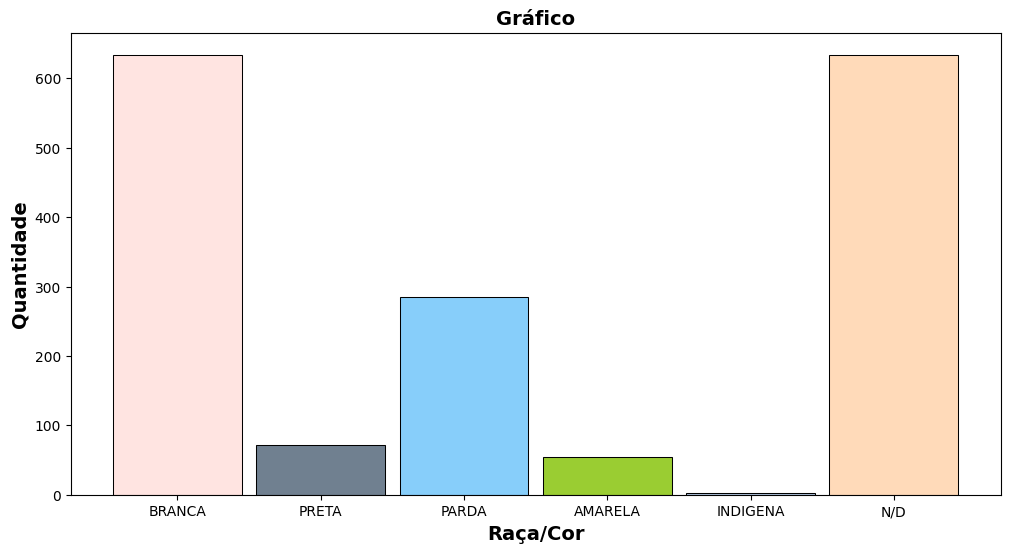

In [10]:
dados = []
etiquetas = ['BRANCA','PRETA','PARDA','AMARELA','INDIGENA','N/D']

for valor in cesGRU2020:
    vlr=(int(cesGRU2020[valor].values))
    dados.append(vlr)

#print(dados)

barPlot(dados, etiquetas, 
            titulo='Gráfico',
            xlabel='Raça/Cor',
            ylabel='Quantidade',

        
            cores=coresPlotar(len(etiquetas)))


In [ ]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [ ]:
x=sample(['a','b','c'],2)

In [ ]:
x